<a href="https://colab.research.google.com/github/berviantoleo/machine-learning-experiment/blob/master/ImageClassification/ML_Dicoding_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.4.1


In [2]:
!wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
      -O /tmp/rockpaperscissors.zip

--2021-05-23 11:14:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.94MB/s    in 91s     

2021-05-23 11:16:15 (3.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os,shutil
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
     
base_dir = '/tmp/rockpaperscissors'

In [4]:
data_gen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        validation_split=0.2,
                        fill_mode = 'nearest')

In [5]:
train_generator = data_gen.flow_from_directory(
            base_dir,  # direktori data latih
            target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel,
            class_mode='categorical',
            classes=['paper', 'rock', 'scissors'],
            batch_size=4)

validation_generator = data_gen.flow_from_directory(
            base_dir,  # direktori data latih
            target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel,
            class_mode='categorical',
            classes=['paper', 'rock', 'scissors'],
            subset="validation",
            batch_size=4)

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [7]:
model.compile(loss='categorical_crossentropy',
                  optimizer=tf.optimizers.RMSprop(),
                  metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95):
          print("\nAkurasi telah mencapai >=95%!")
          self.model.stop_training = True
callbacks = myCallback()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=15, min_lr=0.00001, verbose=2)

In [10]:
history = model.fit(train_generator,
          steps_per_epoch=20,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=300,
          batch_size=128,
          callbacks=[callbacks, reduce_lr],
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)

Epoch 1/300
20/20 - 9s - loss: 1.5948 - accuracy: 0.3875 - val_loss: 1.0873 - val_accuracy: 0.4500
Epoch 2/300
20/20 - 7s - loss: 1.1098 - accuracy: 0.4000 - val_loss: 1.0869 - val_accuracy: 0.3000
Epoch 3/300
20/20 - 7s - loss: 1.1492 - accuracy: 0.4375 - val_loss: 1.2011 - val_accuracy: 0.3500
Epoch 4/300
20/20 - 7s - loss: 1.0932 - accuracy: 0.4125 - val_loss: 0.9669 - val_accuracy: 0.5500
Epoch 5/300
20/20 - 7s - loss: 1.0242 - accuracy: 0.4750 - val_loss: 1.4145 - val_accuracy: 0.3500
Epoch 6/300
20/20 - 7s - loss: 0.8537 - accuracy: 0.6625 - val_loss: 0.8658 - val_accuracy: 0.5500
Epoch 7/300
20/20 - 7s - loss: 0.7637 - accuracy: 0.7000 - val_loss: 0.3924 - val_accuracy: 0.9500
Epoch 8/300
20/20 - 7s - loss: 0.6711 - accuracy: 0.8250 - val_loss: 0.4438 - val_accuracy: 0.8500
Epoch 9/300
20/20 - 7s - loss: 0.6541 - accuracy: 0.6625 - val_loss: 0.5108 - val_accuracy: 0.8000
Epoch 10/300
20/20 - 7s - loss: 0.4857 - accuracy: 0.8375 - val_loss: 0.3400 - val_accuracy: 0.8500
Epoch 11/

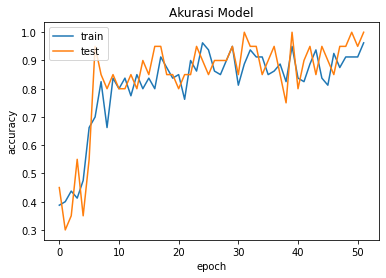

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
[[1. 0. 0.]]
paper


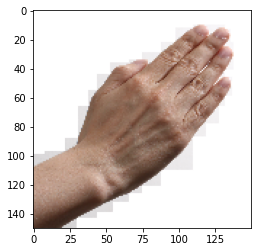

In [12]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      print(classes)
      if classes[0][0]:
        print('paper')
      elif classes[0][1]:
        print('rock')
      else:
        print('scissors')